In [2]:
!pip install plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 1.4 MB/s eta 0:00:12
   ---------------------------------------- 0.1/15.6 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.2/15.6 MB 1.5 MB/s eta 0:00:11
    --------------------------------------- 0.3/15.6 MB 1.9 MB/s eta 0:00:09
   - -------------------------------------- 0.5/15.6 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.6 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.7/15.6 MB 2.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/15.6 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/15.6 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/15.6 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/15.6 MB 2.5 MB/s eta 0:00:06
   --- ------------------------------------ 1.4/15.6 MB 2.6 MB/s eta 0:00:06
   ---


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r'winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


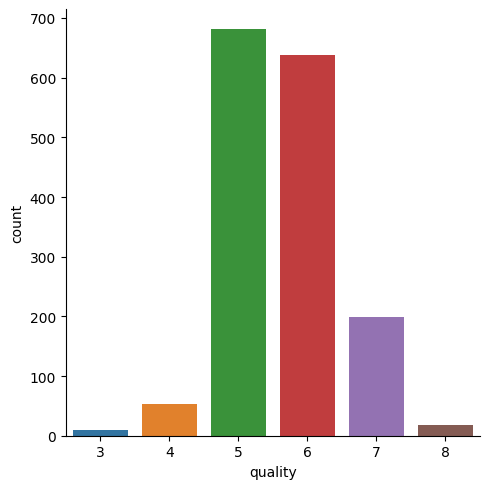

In [9]:
sns.catplot(x='quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

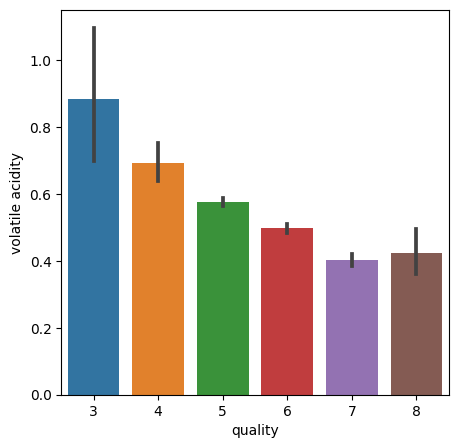

In [10]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

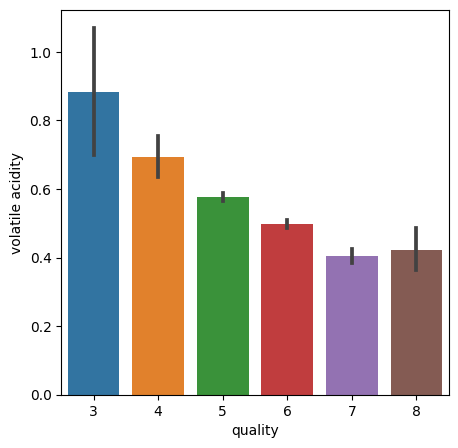

In [11]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

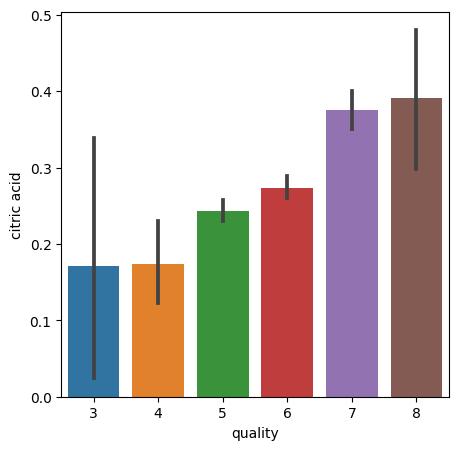

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

In [13]:
correlation = df.corr()

<Axes: >

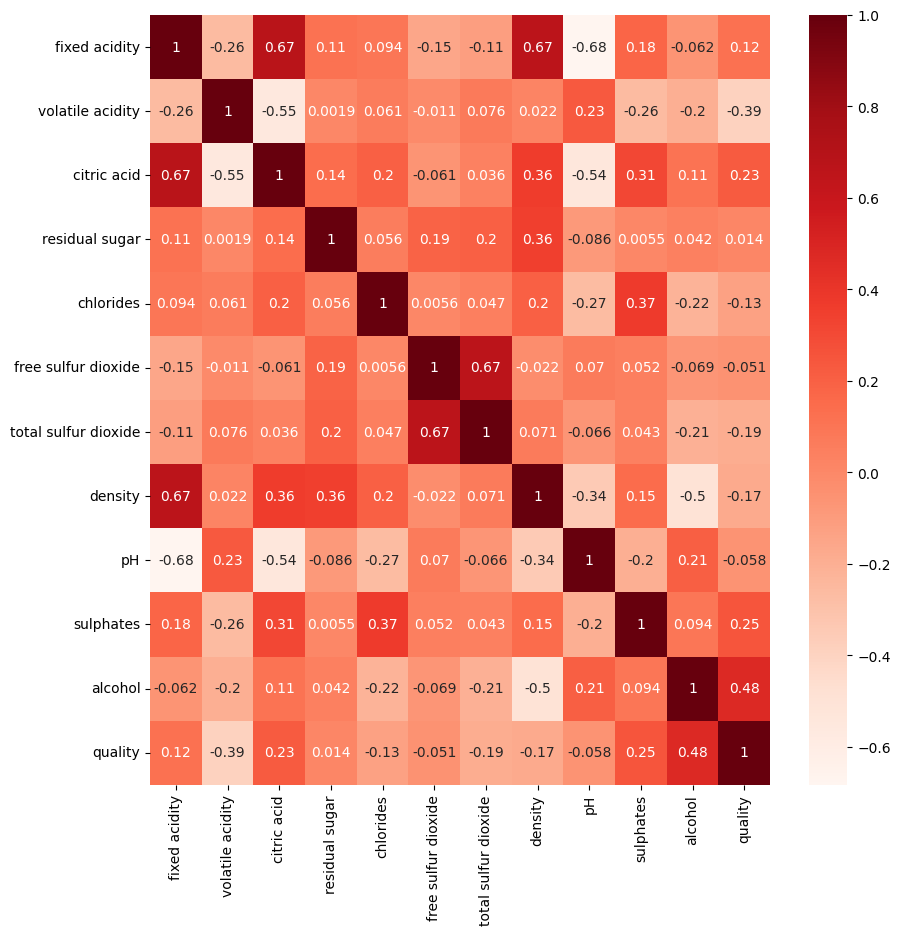

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, annot=True, cmap='Reds')

In [13]:
x = df.drop('quality', axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

NameError: name 'x' is not defined

In [16]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

accuracy_rf = test_data_accuracy*100
print('Accuracy = ', accuracy_rf)

Accuracy =  93.125


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [24]:
modell = KNeighborsClassifier(n_neighbors = 30)
modell.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [25]:
prediction = modell.predict(x_test)

In [26]:
accuracy2 = accuracy_score(y_test,prediction)
accuracy_knn = accuracy2*100
print("Accuracy = ",accuracy_knn)

Accuracy =  90.3125


In [27]:
models = {
    "models": ['RandomForestClassifier','KNeighborsClassifier'],
    "score": [accuracy_rf, accuracy_knn]
}
models

{'models': ['RandomForestClassifier', 'KNeighborsClassifier'],
 'score': [93.125, 90.3125]}

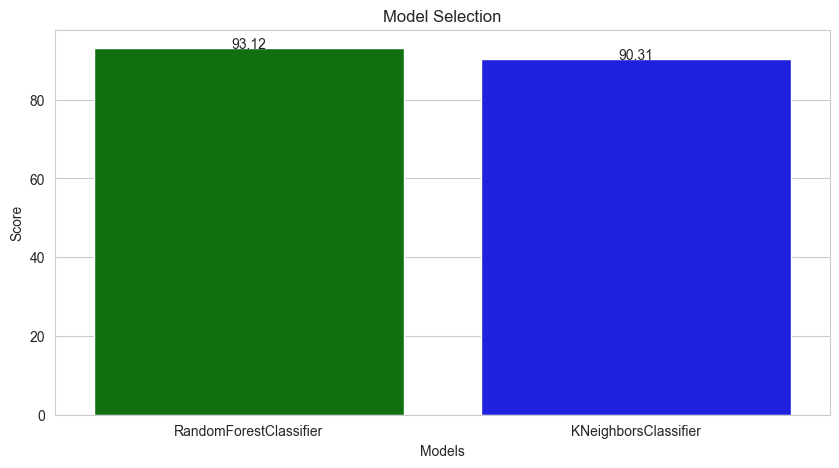

In [28]:
colors = ['green', 'blue']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=models['models'], y=models['score'], palette=colors)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

for p in ax.patches:
  ax.text(x=p.get_x() + p.get_width() / 2.,
          y=p.get_height(),
          s='{:.2f}'.format(p.get_height()),
          ha='center')

plt.show();